# 상관분석

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후에 메뉴 런타임 - 세션 다시 시작

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,517 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and dire

In [ ]:
# 한글 폰트 설정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

## 상관계수

In [ ]:
# 라이브러리 불러오기
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
x = [2, 4, 5, 6, 4, 7, 8, 5, 6, 7]
y = [3, 2, 6, 5, 3, 6, 5, 4, 4, 5]

In [ ]:
# 평균
x_m = np.mean(x);y_m = np.mean(y)
print(x_m, y_m)

5.4 4.3


In [ ]:
# 편차
x_dev = x - x_m;y_dev = y - y_m
print(x_dev, y_dev)

[-3.4 -1.4 -0.4  0.6 -1.4  1.6  2.6 -0.4  0.6  1.6] [-1.3 -2.3  1.7  0.7 -1.3  1.7  0.7 -0.3 -0.3  0.7]


In [ ]:
# x편차와 y편차 곱
xy_dev = x_dev * y_dev;xy_dev

array([ 4.42,  3.22, -0.68,  0.42,  1.82,  2.72,  1.82,  0.12, -0.18,
        1.12])

In [ ]:
# 편차제곱
x_dev2 = x_dev ** 2;y_dev2 = y_dev ** 2
print(x_dev2, y_dev2)

[11.56  1.96  0.16  0.36  1.96  2.56  6.76  0.16  0.36  2.56] [1.69 5.29 2.89 0.49 1.69 2.89 0.49 0.09 0.09 0.49]


In [ ]:
# 상관계수
# 분자 = x편차와 y편차 곱의 합
sum(xy_dev)

14.799999999999997

In [ ]:
# 분모 = 제곱근(x편차제곱합*y편차제곱합)
np.sqrt(sum(x_dev2) * sum(y_dev2))

21.383170952877872

In [ ]:
# 분자/분모
rxy = sum(xy_dev) / np.sqrt(sum(x_dev2) * sum(y_dev2));rxy
# 해석	1) 방향: 양수이므로 양의 상관관계, 직접 상관관계
#       2) 강도: 0.6 ~ 0.8 이므로 강한 크기의 상관관계

0.6921330813196406

In [ ]:
pearsonr(x, y)

PearsonRResult(statistic=0.6921330813196409, pvalue=0.026563850209295442)

In [ ]:
# 함수로 상관계수 구하기
rxy = pearsonr(x, y)[0];rxy

0.6921330813196409

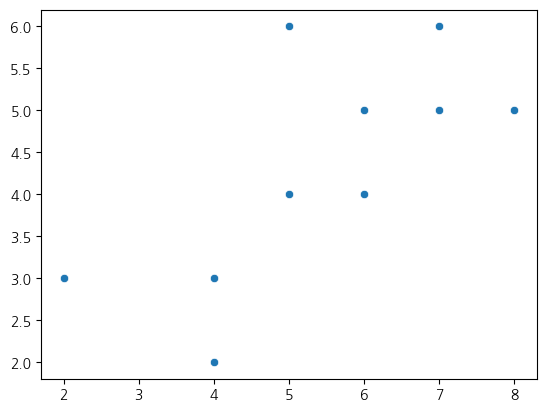

In [ ]:
# 산점도
sns.scatterplot(x = x, y = y)
plt.show()

## 상관행렬

In [ ]:
# 데이터프레임으로 만들기
df = pd.DataFrame({'소득':[57327, 93767, 39410, 94951, 59090, 34628, 31809, 46232, 78707, 37816, 47085, 58394, 77072, 97746, 50302, 61129, 83154, 42798, 93530, 84912],
                   '교육':[10, 9, 8, 15, 15, 11, 13, 15, 16, 9, 8, 9, 13, 15, 14, 16, 16, 13, 9, 9],
                   '태도':[9, 5, 10, 6, 10, 9, 7, 7, 5, 7, 8, 9, 6, 1, 5, 5, 7, 2, 4, 4],
                   '투표':[3, 5, 3, 5, 3, 3, 1, 4, 4, 1, 1, 5, 5, 5, 5, 3, 4, 3, 4, 2]})

In [ ]:
df.head()

,소득,교육,태도,투표
0,57327,10,9,3
1,93767,9,5,5
2,39410,8,10,3
3,94951,15,6,5
4,59090,15,10,3


In [ ]:
# 상관행렬
cor_mat = df.corr();cor_mat

,소득,교육,태도,투표
소득,1.000000,0.192372,-0.510758,0.598967
교육,0.192372,1.000000,-0.279387,0.346282
태도,-0.510758,-0.279387,1.000000,-0.267829
투표,0.598967,0.346282,-0.267829,1.000000


In [ ]:
cor_mat = round(cor_mat, 2);cor_mat

,소득,교육,태도,투표
소득,1.00,0.19,-0.51,0.60
교육,0.19,1.00,-0.28,0.35
태도,-0.51,-0.28,1.00,-0.27
투표,0.60,0.35,-0.27,1.00


In [ ]:
# 음수 기호 나오게 설정
plt.rc('axes', unicode_minus=False)

<Axes: >

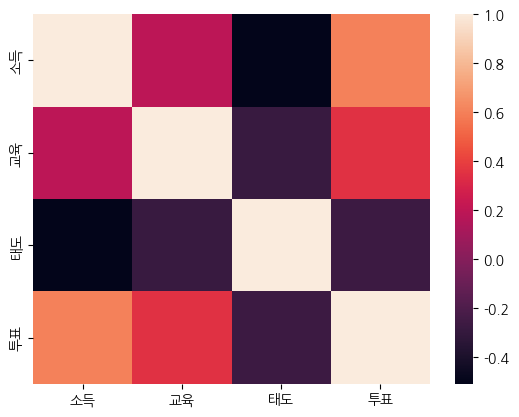

In [ ]:
sns.heatmap(cor_mat)

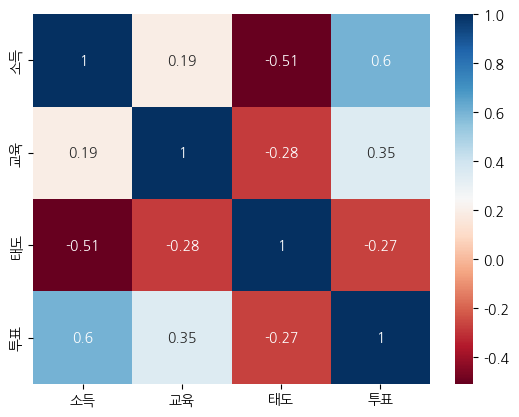

In [ ]:
# 시각화
sns.heatmap(cor_mat,
            cmap = 'RdBu',
            annot = True)
plt.show()

In [ ]:
# 꾸미기
# 상관행렬 차원 (4*4)에 맞게 0으로 채움
mask = np.zeros_like(cor_mat);mask

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
# Return the indices for the upper-triangle of arr
# 대각선 기준 삼각형 윗부분을 1로 채움
# 대각선 기준으로 위 삼각형 자리에 1로 채움
mask[np.triu_indices_from(mask)] = 1;mask

array([[1., 1., 1., 1.],
       [0., 1., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 1.]])

In [ ]:
# 같은 변수를 행렬에서 제외 = 1행부터 끝 & 처음부터 맨 끝의 앞열까지
# 첫번째 행과 마지막 열 제외
mask_new = mask[1:,:-1];mask_new

array([[0., 1., 1.],
       [0., 0., 1.],
       [0., 0., 0.]])

In [ ]:
cor_mat_new = cor_mat.iloc[1:,:-1];cor_mat_new

,소득,교육,태도
교육,0.19,1.00,-0.28
태도,-0.51,-0.28,1.00
투표,0.60,0.35,-0.27


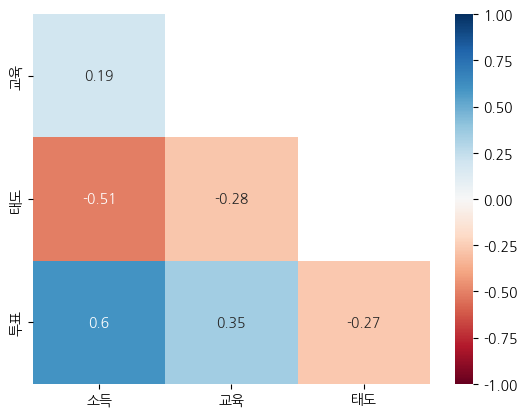

In [ ]:
# 시각화
sns.heatmap(cor_mat_new,
            cmap = 'RdBu',
            annot = True,
            mask = mask_new,
            vmax = 1,
            vmin = -1)
plt.show()

## 문제풀이

### 문제1

In [ ]:
# 문제1
# x = 맞은 문제 개수
# y = 시험에 대한 태도
x = [17, 13, 12, 15, 16, 14, 16, 16, 18, 19]
y = [94, 73, 59, 80, 93, 85, 66, 79, 77, 91]

In [ ]:
# 평균
x_m = np.mean(x);y_m = np.mean(y)
print(x_m, y_m)

15.6 79.7


In [ ]:
# 편차
x_dev = x - x_m;y_dev = y - y_m
print(x_dev, y_dev)

[ 1.4 -2.6 -3.6 -0.6  0.4 -1.6  0.4  0.4  2.4  3.4] [ 14.3  -6.7 -20.7   0.3  13.3   5.3 -13.7  -0.7  -2.7  11.3]


In [ ]:
# x편차와 y편차 곱
xy_dev = x_dev * y_dev;xy_dev

array([20.02, 17.42, 74.52, -0.18,  5.32, -8.48, -5.48, -0.28, -6.48,
       38.42])

In [ ]:
# 편차제곱
x_dev2 = x_dev ** 2;y_dev2 = y_dev ** 2
print(x_dev2, y_dev2)

[ 1.96  6.76 12.96  0.36  0.16  2.56  0.16  0.16  5.76 11.56] [2.0449e+02 4.4890e+01 4.2849e+02 9.0000e-02 1.7689e+02 2.8090e+01
 1.8769e+02 4.9000e-01 7.2900e+00 1.2769e+02]


In [ ]:
# 상관계수
# 분자 = x편차와 y편차 곱의 합
sum(xy_dev)

134.8

In [ ]:
# 분모 = 제곱근(x편차제곱합*y편차제곱합)
np.sqrt(sum(x_dev2) * sum(y_dev2))

226.1385416066885

In [ ]:
# 분자/분모
rxy = sum(xy_dev) / np.sqrt(sum(x_dev2) * sum(y_dev2));rxy
# 해석	1) 방향: 양의 값이므로 양의 상관관계, 직접 상관관계
#      	2) 크기: 0.4 ~ 0.6 이므로 중간 정도 크기의 상관관계

0.5960947613894625

In [ ]:
# 함수로 상관계수 구하기
rxy = pearsonr(x, y)[0];rxy

0.5960947613894625

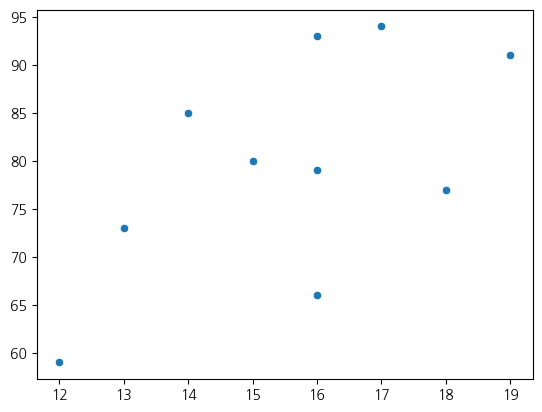

In [ ]:
# 산점도
sns.scatterplot(x = x, y = y)
plt.show()

### 문제2

In [ ]:
# 문제2
# x = 50미터 수영 속도
# y = 들어 올린 역기 무게
x = [21.6, 23.4, 26.5, 25.5, 20.8, 19.5, 20.9, 18.7, 29.8, 28.7]
y = [135, 213, 243, 167, 120, 134, 209, 176, 156, 177]

In [ ]:
# 함수로 상관계수 구하기
rxy = pearsonr(x, y)[0];rxy
# 해석	1) 방향: 양수이므로 양의 상관관계, 직접 상관관계
#      	2) 크기: 0.2 ~ 0.4 사이이므로 약한 크기의 상관관계

0.269220981019037

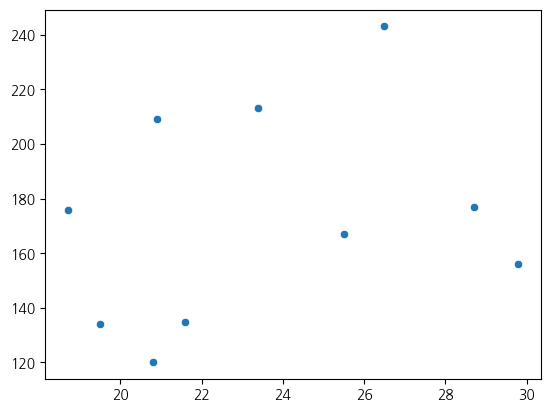

In [ ]:
# 산점도
sns.scatterplot(x = x, y = y)
plt.show()

In [ ]:
# 결정계수
r2 = rxy ** 2;r2
r2 * 100
# 두 변수가 공유하고 있는 분산의 비율은 약 7%이다.

7.247993662085269

### 문제3

In [ ]:
# 문제3
# x = 연수 기간
# y = 성공률
x = [1, 9, 1, 4, 3, 3, 7, 9, 7, 6, 6, 1]
y = [9, 1, 8, 7, 6, 7, 9, 5, 5, 6, 7, 4]

In [ ]:
# 평균
x_m = np.mean(x);y_m = np.mean(y)
print(x_m, y_m)

4.75 6.166666666666667


In [ ]:
# 편차
x_dev = x - x_m;y_dev = y - y_m
print(x_dev, y_dev)

[-3.75  4.25 -3.75 -0.75 -1.75 -1.75  2.25  4.25  2.25  1.25  1.25 -3.75] [ 2.83333333 -5.16666667  1.83333333  0.83333333 -0.16666667  0.83333333
  2.83333333 -1.16666667 -1.16666667 -0.16666667  0.83333333 -2.16666667]


In [ ]:
# x편차와 y편차 곱
xy_dev = x_dev * y_dev;xy_dev

array([-10.625     , -21.95833333,  -6.875     ,  -0.625     ,
         0.29166667,  -1.45833333,   6.375     ,  -4.95833333,
        -2.625     ,  -0.20833333,   1.04166667,   8.125     ])

In [ ]:
# 편차제곱
x_dev2 = x_dev ** 2;y_dev2 = y_dev ** 2
print(x_dev2, y_dev2)

[14.0625 18.0625 14.0625  0.5625  3.0625  3.0625  5.0625 18.0625  5.0625
  1.5625  1.5625 14.0625] [ 8.02777778 26.69444444  3.36111111  0.69444444  0.02777778  0.69444444
  8.02777778  1.36111111  1.36111111  0.02777778  0.69444444  4.69444444]


In [ ]:
# 상관계수
# 분자 = x편차와 y편차 곱의 합
sum(xy_dev)

-33.500000000000014

In [ ]:
# 분모 = 제곱근(x편차제곱합*y편차제곱합)
np.sqrt(sum(x_dev2) * sum(y_dev2))

73.9543778284964

In [ ]:
# 분자/분모
rxy = sum(xy_dev) / np.sqrt(sum(x_dev2) * sum(y_dev2));rxy
# 해석	1) 방향: 음의 값이므로 음의 상관관계, 간접 상관관계
#      	2) 크기: 0.4 ~ 0.6 이므로 중간 정도 크기의 상관관계

-0.4529819732604343

In [ ]:
# 함수로 상관계수 구하기
rxy = pearsonr(x, y)[0];rxy

-0.45298197326043416

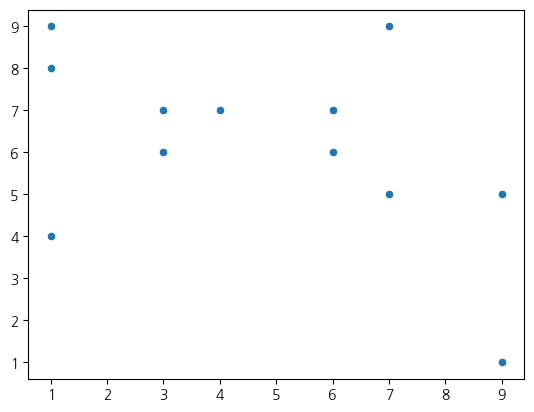

In [ ]:
# 산점도
sns.scatterplot(x = x, y = y)
plt.show()

### 문제4

In [ ]:
# 문제4
# 서로 상관관계가 없는 변수 아무거나
# 나의 근무시간
# 삼촌의 나이

### 문제5

In [ ]:
# 문제5
# 데이터프레임으로 만들기
df = pd.DataFrame({'세정':[2, 4, 2, 3, 4, 5, 4, 3, 2],
                   '횟수':[4, 2, 4, 4, 5, 5, 2, 5, 4],
                   '감염':[1, 2, 2, 3, 1, 1, 5, 4, 2]})

In [ ]:
df.head()

,세정,횟수,감염
0,2,4,1
1,4,2,2
2,2,4,2
3,3,4,3
4,4,5,1


In [ ]:
# 상관행렬
cor_mat = df.corr();cor_mat

,세정,횟수,감염
세정,1.000000,-0.076249,0.026958
횟수,-0.076249,1.000000,-0.429315
감염,0.026958,-0.429315,1.000000


In [ ]:
cor_mat = round(cor_mat, 2);cor_mat

,세정,횟수,감염
세정,1.00,-0.08,0.03
횟수,-0.08,1.00,-0.43
감염,0.03,-0.43,1.00


In [ ]:
# 음수 기호 나오게 설정
plt.rc('axes', unicode_minus=False)

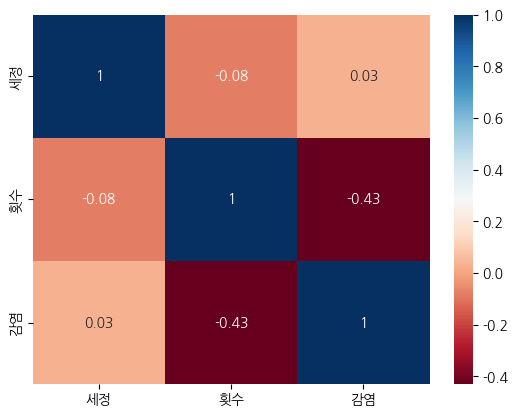

In [ ]:
# 시각화
sns.heatmap(cor_mat,
            cmap = 'RdBu',
            annot = True)
plt.show()

In [ ]:
# 꾸미기
# 상관행렬 차원 (4*4)에 맞게 0으로 채움
mask = np.zeros_like(cor_mat);mask

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
# Return the indices for the upper-triangle of arr
# 대각선 기준 삼각형 윗부분을 1로 채움
# 대각선 기준으로 위 삼각형 자리에 1로 채움
mask[np.triu_indices_from(mask)] = 1;mask

array([[1., 1., 1.],
       [0., 1., 1.],
       [0., 0., 1.]])

In [ ]:
# 같은 변수를 행렬에서 제외 = 1행부터 끝 & 처음부터 맨 끝의 앞열까지
# 첫번째 행과 마지막 열 제외
mask_new = mask[1:,:-1];mask_new

array([[0., 1.],
       [0., 0.]])

In [ ]:
cor_mat_new = cor_mat.iloc[1:,:-1];cor_mat_new

,세정,횟수
횟수,-0.08,1.00
감염,0.03,-0.43


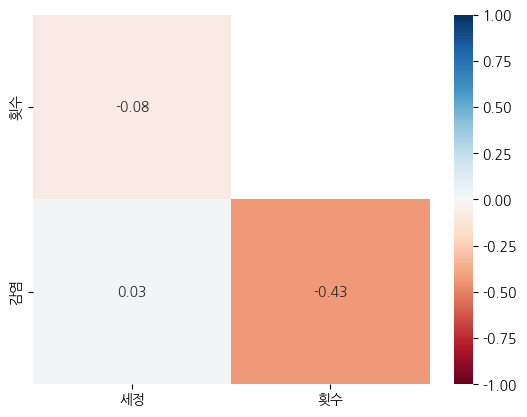

In [ ]:
# 시각화
sns.heatmap(cor_mat_new,
            cmap = 'RdBu',
            annot = True,
            mask = mask_new,
            vmax = 1,
            vmin = -1)
plt.show()
# 1) 방향: 색깔로 표현, 파란색은 양, 빨간색은 음의 상관관계
# 2) 강도: 색깔로 표현, 주황색은 중간 크기, 색이 약한 부분은 약한 크기의 상관관계
# 매일 손을 씻는 횟수(횟수)의 점수가 높을수록 병원 전체 감염 횟수가 작아진다, 크기는 중간 크기 = 상관관계가 중간 정도이다.
# 세정의 점수가 높을수록 병원 전체 감염 횟수가 많아진다, 크기가 매우 작다 = 상관관계가 매우 약하다
# 횟수의 점수가 낮을수록 세정의 점수가 높아진다, 크기가 매우 작다 = 상관관계가 매우 약하다
# 결론: 세정보다 손을 자주 씻는 것이 감염 예방에 도움이 될 것이다.

In [ ]:
# 문제6
# 결정계수	0.64
# 결정계수 = 상관계수 제곱
# 상관계수 = 제곱근(결정계수)
# 상관계수	0.8
r2 = 0.64
r = np.sqrt(r2);r
# 해석	1) 방향: 양수이므로 양의 상관관계, 직접 상관관계
#	      2) 크기: 0.8 ~ 1사이이므로 매우 강한 크기의 상관관계
# 설명되는 분산 = 공유하고 있는 분산의 비율 = 64%
# 설명되지 않은 분산 = 공유하고 있지 않은 분산의 비율 = 36%

0.8

In [ ]:
# 문제8
# 상관관계	아이스크림 판매율과 범죄율의 상관관계가 크다.
# = 아이스크림 판매율이 증가하면 범죄율이 증가한다(같은 방향)

# 인과관계	아이스크림이 많이 팔렸기 때문에 범죄율이 높아졌다
# = 아이스크림 판매율 증가가 원인이고 범죄율 증가가 결과

In [ ]:
# 문제9
# 상관관계	학교 중퇴율과 10대 임신은 상관관계가 크다
# = 학교 중퇴율이 높아지면 10대 임신이 많아진다 (같은 방향)

# 인과관계	학교를 더 오래 다닐수록 임신할 가능성이 낮아진다
# = 학교 중퇴율이 높은 것이 원인이고, 10대 임신이 높은 것이 결과

### 문제10

In [ ]:
# 문제10
# x = 예산증가
# y = 고객수
x = [7, 3, 5, 7, 2, 1, 5, 4, 4]
y = [11, 14, 13, 26, 8, 3, 6, 12, 11]

In [ ]:
from scipy.stats import pearsonr
# 함수 이용하여 상관계수 계산
pearsonr(x, y)[0]
# 1) 방향: 양의 상관관계 (같은 방향)
# 2) 강도: 강한 크기의 상관관계
# 예산이 증가하면 고객수가 늘어난다 = 같은 방향

0.6410602119647096

In [ ]:
from scipy.stats import pearsonr
pearsonr(x, y)

PearsonRResult(statistic=0.6410602119647096, pvalue=0.06280549091377549)

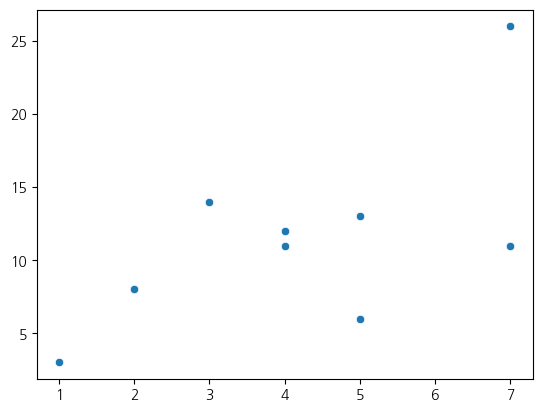

In [ ]:
# 산점도
sns.scatterplot(x = x, y = y)
plt.show()

In [ ]:
# 문제11
# 	방향	강도
# 0.71	양	0.71	1
# 0.36	양	0.36	5
# -0.45	음	0.45	4
# 0.47	양	0.47	3
# -0.62	음	0.62	2

In [ ]:
# 문제12
# 인과관계로 해석해서 잘못된 것
# 마늘을 많이 흔들면 아이가 18개월에서 24개월 사이에 걷게 될 가능성이 높아진다
# = 같은 방향이라는 상관관계로 해석해야 올바른 해석임

## 상관계수에 대한 유의성 검정

In [ ]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, t
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 상관계수 유의성 검정
# x: 결혼생활의 질
# y: 부모-자녀관계의 질
x = [76, 81, 78, 76, 76, 78, 76, 78, 98, 88, 76, 66, 44, 67, 65, 59, 87, 77, 79, 85, 68, 76, 77, 98, 99, 98, 87, 67, 78]
y = [43, 33, 23, 34, 31, 51, 56, 43, 44, 45, 32, 33, 28, 39, 31, 38, 21, 27, 43, 46, 41, 41, 48, 56, 55, 45, 68, 54, 33]

In [ ]:
# 상관계수
rxy = pearsonr(x, y)[0];rxy

0.3934186209743912

In [ ]:
# 결정계수
r2 = rxy ** 2;r2

0.15477821132939165

In [ ]:
# 표본크기
n = len(x);n

29

In [ ]:
# 자유도 = 표본의크기 - 2 (변수의 개수)
df = n - 2;df

27

In [ ]:
# 검정통계량
# 분자 = 표본상관계수-모상관계수(=0)
rxy

0.3934186209743912

In [ ]:
# 분모 = 제곱근((1-결정계수)/자유도)
np.sqrt((1 - r2)/df)

0.17693080763819516

In [ ]:
# 분자 / 분모
tv = rxy / np.sqrt((1 - r2)/df);tv

2.223573306571294

In [ ]:
# 임계값, 유의수준, 양측검정, 자유도
alpha = 0.05
cv = t.ppf(1 - alpha/2, df);cv

2.0518305164802833

In [ ]:
# 결론
cv < tv
# 오른쪽 = 기각역 = 귀무가설 기각 = 대립가설 채택 = 차이가 있다
# 통계적으로 유의한 상관관계가 있다.
# 상관계수가 통계적으로 유의하다.

True

In [ ]:
# 유의확률
pv = (1 - t.cdf(tv, df)) * 2;pv

0.03473593132953301

In [ ]:
# 결론
alpha > pv
# 오른쪽 = 기각역 = 귀무가설 기각 = 대립가설 채택 = 차이가 있다
# 통계적으로 유의한 상관관계가 있다.
# 상관계수가 통계적으로 유의하다.

True

In [ ]:
# 함수를 이용한 상관계수 유의성 검정
pearsonr(x, y)

PearsonRResult(statistic=0.3934186209743912, pvalue=0.03473593132953294)

In [ ]:
rxy, pv = pearsonr(x, y)
print("상관계수: ", rxy)
print("유의확률: ", pv)
# 결혼생활의 질이 높으면 부모-자녀관계의 질이 높다
# 결혼생활의 질이 낮으면 부모-자녀관계의 질이 낮다
# 이 상관관계는 같은 방향을 가지고 있다.
# 또한 약한 크기의 상관관계
# 이 상관관계는 통계적으로 유의하다.

상관계수:  0.3934186209743912
유의확률:  0.03473593132953294


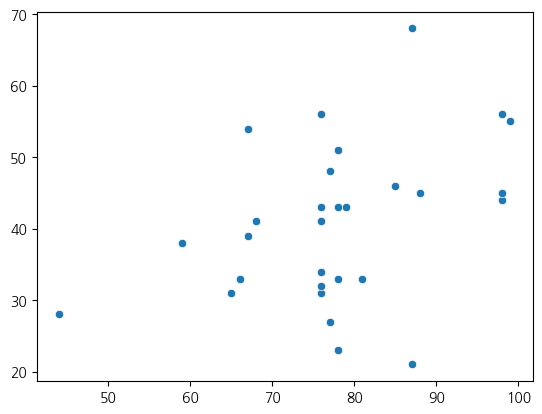

In [ ]:
# 산점도
sns.scatterplot(x = x, y = y)
plt.show()

## 문제풀이

### 문제3

In [ ]:
# 문제3
# x: 동기부여
# y: 평균성적(GPA)
x = [1, 6, 2, 7, 5, 4, 3, 1, 8, 6, 5, 6, 5, 5, 6, 6, 7, 7, 2, 9, 8, 8, 7, 6, 9, 7, 8, 7, 8, 9]
y = [3.4, 3.4, 2.5, 3.1, 2.8, 2.6, 2.1, 1.6, 3.1, 2.6, 3.2, 3.1, 3.2, 2.7, 2.8, 2.6, 2.5, 2.8, 1.8, 3.7, 3.1, 2.5, 2.4, 2.1, 4, 3.9, 3.1, 3.3, 3, 2]

In [ ]:
# 상관계수
rxy = pearsonr(x, y)[0];rxy

0.43402264347318786

In [ ]:
# 결정계수
r2 = rxy ** 2;r2

0.18837565504745393

In [ ]:
# 표본크기
n = len(x);n

30

In [ ]:
# 자유도 = 표본의크기 - 2 (변수의 개수)
df = n - 2;df

28

In [ ]:
# 검정통계량
# 분자 = 표본상관계수-모상관계수(=0)
rxy

0.43402264347318786

In [ ]:
# 분모 = 제곱근((1-결정계수)/자유도)
np.sqrt((1 - r2)/df)

0.1702544676309706

In [ ]:
# 분자 / 분모
tv = rxy / np.sqrt((1 - r2)/df);tv

2.549258468881646

In [ ]:
# 임계값, 유의수준, 양측검정, 자유도
alpha = 0.05
cv = t.ppf(1 - alpha/2, df);cv

2.048407141795244

In [ ]:
# 결론
cv < tv
# 오른쪽 = 기각역 = 귀무가설 기각 = 대립가설 채택 = 차이가 있다
# 통계적으로 유의한 상관관계가 있다.
# 상관계수가 통계적으로 유의하다.

True

In [ ]:
# 유의확률
pv = (1 - t.cdf(tv, df)) * 2;pv

0.01655923778766555

In [ ]:
# 결론
alpha > pv
# 오른쪽 = 기각역 = 귀무가설 기각 = 대립가설 채택 = 차이가 있다
# 통계적으로 유의한 상관관계가 있다.
# 상관계수가 통계적으로 유의하다.

True

In [ ]:
# 함수를 이용한 상관계수 유의성 검정
pearsonr(x, y)

PearsonRResult(statistic=0.43402264347318786, pvalue=0.016559237787665684)

In [ ]:
rxy, pv = pearsonr(x, y)
print("상관계수: ", rxy)
print("유의확률: ", pv)
# 동기부여가 높으면 평균 성적이 높다
# 동기부여가 낮으면 평균 성적이 낮다
# 이 상관관계는 같은 방향을 가지고 있다.
# 또한 중간 정도 크기의 상관관계
# 이 상관관계는 통계적으로 유의하다.

상관계수:  0.43402264347318786
유의확률:  0.016559237787665684


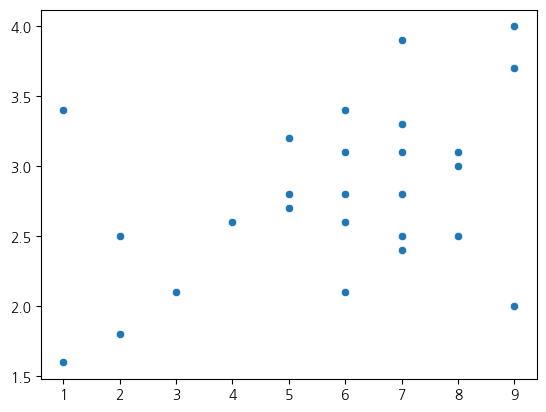

In [ ]:
# 산점도
sns.scatterplot(x = x, y = y)
plt.show()

### 문제4

In [ ]:
# 문제4
# x: 책의 권수
# y: 교육수준
x = [68, 345, 276, 756, 43, 546, 58, 187, 286, 93, 376, 623, 876, 28, 289]
y = [11, 15, 16, 12, 6, 14, 6, 14, 9, 8, 11, 18, 12, 4, 15]

In [ ]:
# 상관계수
rxy = pearsonr(x, y)[0];rxy

0.5576823353198195

In [ ]:
# 결정계수
r2 = rxy ** 2;r2

0.31100958712776755

In [ ]:
# 표본크기
n = len(x);n

15

In [ ]:
# 자유도 = 표본의크기 - 2 (변수의 개수)
df = n - 2;df

13

In [ ]:
# 검정통계량
# 분자 = 표본상관계수-모상관계수(=0)
rxy

0.5576823353198195

In [ ]:
# 분모 = 제곱근((1-결정계수)/자유도)
np.sqrt((1 - r2)/df)

0.2302156869733973

In [ ]:
# 분자 / 분모
tv = rxy / np.sqrt((1 - r2)/df);tv

2.4224341210260913

In [ ]:
# 임계값, 유의수준, 양측검정, 자유도
alpha = 0.05
cv = t.ppf(1 - alpha/2, df);cv

2.1603686564610127

In [ ]:
# 결론
cv < tv
# 오른쪽 = 기각역 = 귀무가설 기각 = 대립가설 채택 = 차이가 있다
# 통계적으로 유의한 상관관계가 있다.
# 상관계수가 통계적으로 유의하다.

True

In [ ]:
# 유의확률
pv = (1 - t.cdf(tv, df)) * 2;pv

0.030764408084154482

In [ ]:
# 결론
alpha > pv
# 오른쪽 = 기각역 = 귀무가설 기각 = 대립가설 채택 = 차이가 있다
# 통계적으로 유의한 상관관계가 있다.
# 상관계수가 통계적으로 유의하다.

True

In [ ]:
# 함수를 이용한 상관계수 유의성 검정
pearsonr(x, y)

PearsonRResult(statistic=0.5576823353198195, pvalue=0.03076440808415437)

In [ ]:
rxy, pv = pearsonr(x, y)
print("상관계수: ", rxy)
print("유의확률: ", pv)
# 책의 권수가 많아질수록 교육수준이 높아진다
# 책의 권수가 적어질수록 교육수준이 낮아진다
# 이 상관관계는 같은 방향을 가지고 있다.
# 또한 중간 정도 크기의 상관관계
# 이 상관관계는 통계적으로 유의하다.

상관계수:  0.5576823353198195
유의확률:  0.03076440808415437


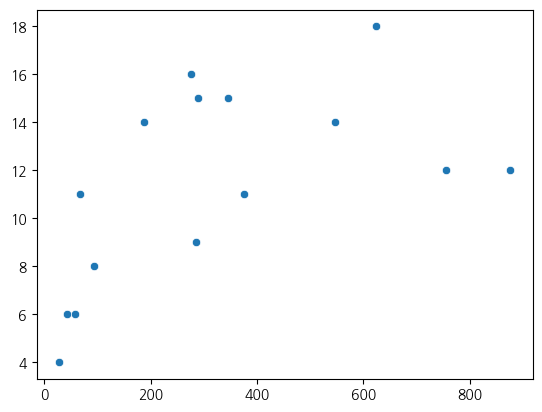

In [ ]:
# 산점도
sns.scatterplot(x = x, y = y)
plt.show()